# <center> PPOL564 | DS1: Foundations <br><br> Checkpoint Assignment 4  </center>

# Instructions

In this assignment, you'll practice on what you have learned regarding the calculus concepts covered in this course. This assignment should be completed independently or with your randomly assigned partner (see Course Policies "Homework Partner" in the Syllabus). 

**Be careful to follow the instructions for each question.** 

Recall that all assignment submissions must adhere to the following guidelines: 

- (i) all code must run; one point will be deducted if the entire notebook doesn't run on the Professor's/TA's computer (<font color = "darkred">Point(s) = 1</font>)
- (ii) solutions should be readable
    + Code should be thoroughly commented (the Professor/TA should be able to understand the code's purpose by reading the comment),
    + Coding solutions should be broken up into individual code chunks in Jupyter notebooks, not clumped together into one large code chunk,
    + Each student defined function must contain a doc string explaining what the function does, each input argument, and what the function returns;
    + All numerical output should be rounded to the second decimal place.
- (iii) Commentary, responses, and/or written solutions should all be written in Markdown and should contain no grammatical or spelling errors;
- (iv) All mathematical formulas should be written in LaTex;

There are a total of **_22 points_** available for this assignment.

Please assign your name and netid to the following objects as strings.

In [1]:
name = 'Tianwei Liu'
netid = 'tl743'

# Part 1: Answer the Questions

(1 points each)

#### Question 1:  Describe what a gradient is and why it's useful

A gradient is a vector with each element being the partial derivative with respect to each variable in a function. The gradient is useful because it tells us in which direction the function moves given a vector in the same dimensional space. Moreover, gradient points in the direction of steepest ascent, therefore, gradient of a function also helps us identify and locate local extrema. 

#### Question 2: What is the following equation (see below), how do we derive it, and what does it tell us?

$$ \frac{\partial^2}{ \partial x^2 }\frac{\partial^2}{ \partial y^2 } - \frac{\partial^2 f}{\partial_y \partial_x} \frac{\partial^2 f}{\partial_x \partial_y}$$

The equation is the determinant of the Hessian. The Hessian is composed of second order partial derivatives on its diagonal and cross-partial derivatives in other positions. The determinant of the Hessian $ |\textbf{H}| $ can tell us types of stationary points. If $ |\textbf{H}| > 0$, then extrema exist at stationary points; if $ |\textbf{H}| < 0$, then the stationary point is a saddle point; if $ |\textbf{H}| = 0$, we are not sure because we do not have enough information.

#### Question 3: When optimizing, when should we consider higher-order derivatives and why?

When optimizing, we first obtain first-order derivative of the function and set it to zero. In this way, we find the critical point(s) of a given function. However, being critical points does not guarantee whether critical points are local maxima/minima or saddles points. Therefore, to figure out whether critical points are maxima/minima or saddle points, we need to consider higher-order derivatives as they give us more information about the curvature of the function. For $f''(x*) > 0$, the critical point is a local minimum; for $f''(x*) < 0$, the critical point is a local maximum. For $f''(x*) = 0$, we need to go even further - we need to rely on the third-order derivative to decide whether it is indeed a inflection point. 

#### Question 4: What does the learning rate dictate when running a gradient descent algorithm?

The learning rate in a gradient descent algorithm dictates how fast the model prediction converges to the true value. A very small learning rate would take many steps to realize the goal; while a big learning rate would cause the model to learn quickly but might lead the model to arriving at a sub-optimal set of weights or even diverging.

# Part 2: Univariate Optimization

(2 points each)

Find all critical points in the specified domain and determine whether they are minima, maxima, or neither for the following functions. For all minima/maxima determine if they are local or global given the domain constraints. Show and describe all steps. Failure to comment will result in a deduction in points. All equations should be written in `Latex`.

In [255]:
import numpy as np
from sympy import * 
init_printing(use_unicode=True)
import matplotlib.pyplot as plt
import numpy.linalg as la
import requests

In [272]:
# Import Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import row, column
from bokeh.models import Span, PointDrawTool
output_notebook()

def plot(w=700,h=500,title='',x='X',y='f(x)'):
    '''Wrapper function to ease starting a new plot.'''
    p = figure(plot_width=w,plot_height=h,title=title,
           toolbar_location="above",
           tooltips=[("out", "$y"),("x", "$x")],
           tools='pan,hover,wheel_zoom,reset')
    
    # Define a continuous line for the x-axis
    hline = Span(location=0, dimension='width', line_color='grey', line_width=1)
    p.renderers.extend([hline])
    
    # Labels
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    return p

def draw(p):
    '''Wrapper function for generating a drawing tool on a graph'''
    renderer = p.scatter(x=[], y=[], color='black', size=10)
    draw_tool = PointDrawTool(renderers=[renderer], empty_value='black')
    p.add_tools(draw_tool)
    p.toolbar.active_tap = draw_tool
    return p

Loading BokehJS ...

### Question 1
Given $x \in [-10,10]$

$$ f(x) = 5x + 2x^2$$



In [217]:
x = symbols('x')
f = 5*x + 2*x**2
f

2*x**2 + 5*x

In [218]:
# Take the derivative of f
df = f.diff()
df

4*x + 5

In [301]:
# Find critical points
critical = list(solveset(Eq(df,0),domain=Interval(-10,10)))
critical

In [226]:
# Calculate the second derivative and find out the second derivative at critical points
ddf = df.diff()
second = ddf.evalf(subs={x: critical[0]})
second

4.00000000000000

In [227]:
# Since the second order derivative at the critical point is positive, it is a local minimum
f.evalf(subs={x: -5/4})

-3.12500000000000

In [228]:
# Check boundary values
boundaries = [-10,10]
print('Boundary Values:')
for b in boundaries:
    ev = f.evalf(subs={x: b})
    print(f'f({round(b,2)}) = {round(ev,2)}')

Boundary Values:
f(-10) = 150.0
f(10) = 250.0


In [229]:
## Plot the function on [-10, 10]
x = np.arange(-10,10.01,0.01)
def f(x):
    return 5*x + 2*x**2
p = plot(w=700,h=400,title="g(x)")
p.line(x,f(x),line_width=3,alpha=.5,color="orange")
show(p)

The stationary point at $ x = - \frac {5}{4} $ is both local and global minimum ($f( - \frac {5}{4}) = -3.125 $), and global maxima is at the boundary $ x = 10 $, which has a value of 250.

### Question 2
Given $x \in [-3,3]$

$$ g(x) = 3\sin{x} + \cos{x}$$

In [241]:
## Input the function using Sympy
x = symbols('x')
g = 3* sin(x) + cos(x)
g

3*sin(x) + cos(x)

In [231]:
# Derivative
dg = g.diff()
dg

-sin(x) + 3*cos(x)

In [300]:
# Find critical points
critical = list(solveset(Eq(dg,0),domain=Interval(-3,3)))
critical

In [233]:
# Find the second derivative
ddg = dg.diff()
ddg

-3*sin(x) - cos(x)

In [234]:
## Evaluate the second order derivative at critical points
ddg.evalf(subs={x: atan(3)}).round(2)

-3.16

In [235]:
ddg.evalf(subs={x:-pi + atan(3)}).round(2)

3.16

The second order derivative for critical point $ x = atan(3)$ is $-3.16$; for critical point $x = -pi + atan(3)$ is $3.16$. Therefore, $ x = atan(3)$ is a local maximum and $x = -pi + atan(3)$ is a local minimum.

In [236]:
## Calculate functional values
g.evalf(subs={x: atan(3)}).round(2)

3.16

In [237]:
g.evalf(subs = {x:-pi + atan(3)}).round(2)

-3.16

In [238]:
## Check for boundary conditions
boundaries = [-3,3]
print('Boundary Values:')
for b in boundaries:
    ev = g.evalf(subs={x: b})
    print(f'g({round(b,2)}) = {round(ev,2)}')

Boundary Values:
g(-3) = -1.41
g(3) = -0.57


In [243]:
## Graph
x = np.arange(-3,3.1,.1)
def g(x):
    return 3* np.sin(x) + np.cos(x)

p = plot(w=700,h=400,title="g(x)")
p.line(x,g(x),line_width=3,alpha=.5,color="orange")
show(p)

Given our analysis above, on $ [-3,3] $, $atan(3)$ is both a local and global maximum ($g(atan(3) = 3.16)$); $-pi + atan(3)$ is both local and global minima ($g(-pi + atan(3)) = -3.16$).

### Question 3

Given $x \in [-1,10]$

$$ k(x) = \frac{x^3}{e^x} $$

In [304]:
x = symbols('x')
k = x**3 / E**x
k

In [305]:
## Take the derivative
dk = k.diff()
dk

In [306]:
## Find critical points
critical = list(solveset(Eq(dk,0), domain = Interval(-1,10)))
critical

In [307]:
## Take second order derivative
ddk = dk.diff()
ddk

In [308]:
## Second order derivative at critical points
ddk.evalf(subs = {x:0})

In [309]:
ddk.evalf(subs = {x:3})

At $ x = 3$, the second derivative is negative, so it is a local maximum. However, the second derivative at $ x = 0 $ is 0, we do not have enough information to judge so we need to take the third order derivative. 

In [310]:
## Third order derivative
dddk = ddk.diff()
dddk.evalf(subs = {x:0})

Since the third order derivative is not zero. Then the point $ x = 0 $ is an inflection point.

In [311]:
## Check for boundary conditions
boundaries = [-1,10]
print('Boundary Values:')
for b in boundaries:
    ev = k.evalf(subs={x: b})
    print(f'k({round(b,2)}) = {round(ev,2)}')

Boundary Values:
k(-1) = -2.72
k(10) = 0.05


In [312]:
## graph
x = np.arange(-1, 10.1, .1)
def k(x):
    return x**3 / np.e**x
p = plot(w=700,h=400,title="g(x)")
p.line(x,k(x),line_width=3,alpha=.5,color="blue")
show(p)

Therefore, the critical point at $x = 0 $ is an inflection (saddle) point. $x = 3$ is both a local and global maximum. The global minimum occurs at the boundary when $x = -1$. 

# Part 3: Multivariate Optimization

(2 points each)

Find all critical points and determine whether they are minima, maxima, or neither for the following functions. For all minima/maxima determine if they are local or global given the domain constraints. Show and describe all steps. Failure to comment will result in a deduction in points. All equations should be written in `Latex`.

### Question 1: 

$$ g(x,y,z) = x^2+ z^2 + z(-yx) + y^2 $$

In [313]:
x, y, z = symbols ('x y z')
g = x**2 + z**2 + z*(-y * x) + y**2
g

In [314]:
## Firstly, we calculate the gradient
g_x = g.diff(x)
g_y = g.diff(y)
g_z = g.diff(z)
gradient = [g_x, g_y, g_z]
gradient

In [315]:
## Find critical points
critical = solve(gradient,[x,y,z])
critical

In [316]:
## Calculate the Hessian
H = [g.diff(term).diff(term2) for term in [x,y,z] for term2 in [x,y,z]]
H = np.matrix(H).reshape(3,3)
H

matrix([[2, -z, -y],
        [-z, 2, -x],
        [-y, -x, 2]], dtype=object)

In [317]:
## Since we have 5 critical points, we create a function to calcualte the det of the Hessian for each critical value.
def detH(crit_points):

    '''
    This function calculates the determinant of the Hessian for critical points.
    '''
    x = crit_points[0]
    y = crit_points[1]
    z = crit_points[2]
    
    H = np.matrix([[2,-z,-y],[-z,2,-x],[-y,-x,2]],dtype='float')
    return(la.det(H))

[detH(points) for points in critical]

The determinant for the Hessian is negative for critical points (-2, -2, 2), (-2, 2, -2),(2, -2, -2), (2, 2, 2). Therefore, these four stationary points are saddle points. 
For (0,0,0), the determinant of the Hessian is positive, so a minimum or maximum point exists. We take a closer look into this point.

In [318]:
H0 = np.matrix([[2,0,0],[0,2,0],[0,0,2]])
## This matrix is already a diagonal matrix, so all eigenvalues are equal to 2.

Since all $\lambda s$ are greater than zero, then the stationary point (0,0,0) is a local minimum. 

In [319]:
## Plug the value back into g
g.evalf(subs = {x:0, y:0, z:0})

### Question 2: 

$$ f(x,y) = 5+ -3y^2+ y^{cos{\frac{\pi}{2}}} - 4x^2 + xy^{\frac{3}{20}}$$

In [320]:
x, y = symbols('x y')
f = 5 + (-3*y**2) + y**cos(pi/2) - 4*x**2 + x*y**(3/20) ## cos(pi/2) == 0
f

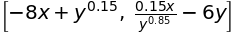

In [321]:
## Calculate the gradient
f_x = f.diff(x)
f_y = f.diff(y)
gradient = [f_x, f_y]
gradient

In [322]:
## Calculate critical points
critical = solve(gradient, [x,y])
critical

In [323]:
## Calculate the Hessian
f_xx = f_x.diff(x)
f_xy = f_x.diff(y)
f_yy = f_y.diff(y)
f_yx = f_y.diff(x)
H = np.matrix([[f_xx,f_xy],[f_yx,f_yy]])
H

matrix([[-8, 0.15*y**(-0.85)],
        [0.15*y**(-0.85), -0.1275*x*y**(-1.85) - 6]], dtype=object)

In [324]:
## Since we have 5 critical points, we create a function to calcualte the det of the Hessian for each critical value.

x = critical[0][0]
y = critical[0][1]
    
H1 = np.matrix([[-8, 0.15*y**(-0.85)],[0.15*y**(-0.85), -0.1275*x*y**(-1.85) - 6]],dtype='float')
la.det(H1)

Since the determinant of the Hessian for the critical value is positive, there exists a local minimum/maximum. 

In [325]:
## Look at the eigenvalues of the Hessia
la.eigvals(H1)

array([ -6.45120991, -12.64879009])

Since eigenvalues are negative, we can conclude that $x* = (0.0751393385851361, 0.0336033337721474)$ is a local maximum.

### Question 3: 

$$ h(x,y,z) = (xy)^2 - zy + xz $$

In [326]:
x,y,z = symbols('x y z')
h = (x*y)**2 - z*y + x*z
h

In [327]:
## Calculate the gradient
h_x = h.diff(x)
h_y = h.diff(y)
h_z = h.diff(z)
gradient = [h_x, h_y, h_z]
gradient

In [328]:
## Find critical points
critical = solve(gradient,[x,y,z])
critical

In [329]:
## The Hessian
H = [h.diff(term).diff(term2) for term in [x,y,z] for term2 in [x,y,z]]
H = np.matrix(H).reshape(3,3)
H

matrix([[2*y**2, 4*x*y, 1],
        [4*x*y, 2*x**2, -1],
        [1, -1, 0]], dtype=object)

In [330]:
## Find out the determinant of the Hessian at the critical point
x = 0
y = 0
z = 0

H2 = np.matrix([[2*y**2, 4*x*y, 1],
        [4*x*y, 2*x**2, -1],
        [1, -1, 0]])
la.det(H2)

Since the determinant of the Hessian is equal to 0, the stationary point is indeterminant by the second derivative test. 

# Part 4: Gradient Descent

(5 points)

**Can we predict whether someone will vote or not?**

The `turnout.csv` data is drawn from the 2012 National Election Survey. The data records the age, eduction level (of total years in school), income, race (caucasian or not), and whether or not the respondent voted in the 2012 Presidential election. The sample composes 2000 individual respondents in total. I have broken the data up into a training (1600 entries, 80%) and test dataset (400 entries, 20%) (see below). 

Use what we know of gradient descent to build a model that tries to predict whether a respondent will vote in a presidential election. To model a probability, we'll use the logistic link function (as we did in lecture):

$$ \nu(z) = \frac{1}{1+e^{-z}}  $$

Likewise, we'll define our cost function (i.e. our metric for how right our guesses are with each adjustment of the weights) as we did in class, using cross-entropy:

$$ C = - \frac{1}{N} \sum_{i=1}^N  y_i log(\nu(X_i\beta)) + (1-y_i) log((1-\nu(X_i\beta)))$$

Feel free to manipulate the data however you see fit; however, note that I've standardized the larger values (stark differences in the ranges can result in convergence problems).

Run your algorithm. Report the weights ('coefficients') for each indicator used in your model. Once you've tuned your weights using the training data (i.e. once you've minimized the cost function), use those weights to try and predict if a respondent will vote in the test data. 

Report how accurate you were on predicting someone's propensity to vote in the test data. Answer the following:

- Did you do better or worse than chance (50%)? 
- Did you do better or worse than just guessing all ones or all zeros?

When completing this answer, be sure to: 

- comment on all your code
- provide a narrative for what you're doing
- summarize your results and findings

In [331]:
import pandas as pd
import numpy as np
import sympy as sp
dat = pd.read_csv('turnout.csv')

# Standardize the (more) continous metrics
def standardize(x):
    '''Center the mean and set the variance to 1'''
    return (x-np.mean(x))/np.std(x)
dat['age'] = standardize(dat['age'])
dat['income'] = standardize(dat['income'])
dat['educate'] = standardize(dat['educate'])

# Break data up into training and test data
train=dat.sample(frac=0.8,random_state=323)
test=dat.drop(train.index)

# Preview the training data 
train.head(20)

,id,age,educate,income,vote,white
1352,1353,0.040199,-0.910295,-0.723155,0,0
121,122,-1.158908,0.870668,-0.009214,1,1
1529,1530,1.353506,1.464322,3.332264,1,1
161,162,0.439901,-0.613467,-0.108501,1,1
1806,1807,-0.645005,1.167495,0.560714,1,0
122,123,-0.587905,-0.019813,-0.471363,1,1
1818,1819,1.696108,-0.019813,-0.254424,1,1
1015,1016,-0.302403,0.573841,-0.418783,1,0
536,537,-0.530805,-0.613467,-0.568916,1,1
1865,1866,-0.987607,1.464322,0.716333,1,1


In [332]:
## vote
y = train.vote

## Matrix for constant and independent variables
X = np.column_stack([np.ones(train.shape[0]),train.age, train.educate, train.income, train.white])
X

array([[ 1.        ,  0.04019863, -0.91029464, -0.72315482,  0.        ],
       [ 1.        , -1.15890823,  0.87066821, -0.00921395,  1.        ],
       [ 1.        ,  1.35350614,  1.4643225 ,  3.33226427,  1.        ],
       ...,
       [ 1.        ,  0.55410157, -0.31664035, -0.8657873 ,  1.        ],
       [ 1.        ,  0.95380386, -0.01981321,  0.99519332,  1.        ],
       [ 1.        , -0.0169017 , -0.01981321,  0.17294235,  1.        ]])

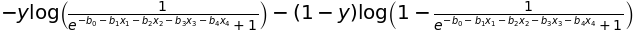

In [333]:
## Cost function
b0,b1,b2,b3,b4,x1,x2,x3,x4 ,y_sym = sp.symbols('b0 b1 b2 b3 b4 x1 x2 x3 x4 y')
z_sym = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4
s_sym = 1/(1+sp.exp(-z_sym))
c = -y_sym*sp.log(s_sym)-(1-y_sym)*sp.log(1-s_sym)
c

In [334]:
# Defining the logistic link function
def s(z):
    '''sigmoid function'''
    return 1/(1+np.exp(-z))

def ds(z):
    '''first-order derivative of the function'''
    return np.exp(-x)/(1 + np.exp(-x))**2

## Define cost function
def cost(y,X,B):
    '''
    Cross-Entropy Cost
    '''
    z = X.dot(B)
    n = len(y)
    return -sum(y*np.log(s(z))+(1-y)*np.log(1-s(z)))/n

## Calculate the gradient

def calc_gradient(y,X,B):
    '''
    Calculate and average the gradient for every entry in the data.
    '''
    z = X.dot(B)
    n = len(y)
    grad = [sum(s(z)-y)/n ]
    for i in range(1,X.shape[1]):
        grad.append(sum(X[:,i]*(s(z)-y))/n)
    return np.array(grad)

In [335]:
np.random.seed(123)
B = np.random.uniform(-1,1,5) # starting values
learning = 1
n_iter = 1000
stats = []
for i in range(n_iter):
    grad = calc_gradient(y,X,B)
    B = B - learning*grad
    
    # Store output values...
    stats.append(np.hstack([cost(y,X,B),B]))
    
stats = np.array(stats)

# Let's print out the resulting coefficients ("weights")
print(B)

[1.01152834 0.48637894 0.62033015 0.49024787 0.2772886 ]


In [336]:
## Let's see how well we did

import statsmodels.discrete.discrete_model as sm
sm.Logit(y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.507889
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1595
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:                  0.1107
Time:                        11:01:22   Log-Likelihood:                -812.62
converged:                       True   LL-Null:                       -913.74
Covariance Type:            nonrobust   LLR p-value:                 1.244e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0115      0.154      6.559      0.000       0.709       1.314
x1             0.4864      0.067      7.247      0.000       0.355       0.618
x2             0.6203      0.077      8.085      0.000       0.470       0.771
x3             0.4902      0.085      5.749      0.000       0.323       0.657
x4             0.2773      0.162      1.708      0.088      -0.041       0.595
==============================================================================
"""

In [337]:
## View test dataset
test.head()

,id,age,educate,income,vote,white
0,1,0.839603,0.573841,-0.191370,1,1
2,3,-1.216009,-0.019813,-1.152185,0,1
3,4,-0.416604,-1.207122,-0.165717,1,1
7,8,0.611202,-0.613467,1.922711,1,1
11,12,0.382801,-0.019813,1.692398,1,1


In [338]:
## Outcome y
y_test = test.vote

## Matrix for constant and independent variables
X_t = np.column_stack([np.ones(test.shape[0]),test.age, test.educate, test.income, test.white])
X_t

array([[ 1.        ,  0.8396032 ,  0.57384107, -0.19137025,  1.        ],
       [ 1.        , -1.21600855, -0.01981321, -1.15218456,  1.        ],
       [ 1.        , -0.41660398, -1.20712178, -0.16571692,  1.        ],
       ...,
       [ 1.        , -1.04470757,  0.57384107,  0.77974078,  1.        ],
       [ 1.        , -0.75920594, -0.01981321, -0.48371199,  1.        ],
       [ 1.        , -1.1018079 ,  0.27701393,  0.35693861,  1.        ]])

In [339]:
## We use the coefficients generated from our train model to predict the voting likelihood of people in the test dataset

prob = s(X_t.dot(B))
prob[:5]

array([0.87646089, 0.53002115, 0.56368549, 0.89549535, 0.90824621])

Predict whether a person will vote by comparing its predicted likelihood with 0.5 threshold.

In [340]:
prediction = prob >= .5
prediction = prediction.astype("int")
prediction[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [341]:
## Check for accuracy
sum(prediction == y_test)/len(y_test)

Let's compare our results with 1) 50/50% chance; 2) guessing all ones or all zeros.

In [342]:
## (1)
import random
ls = []
for i in range(len(prob)):
    if random.random() < 0.5:
        ls.append(0)
    else:
        ls.append(1)
        
ls = np.array(ls)

In [343]:
## Accuracy for 50/50 prediction
sum(ls == y_test)/len(y_test)

Therefore, our model did better than fair chance prediction.

In [344]:
## (2) let's now compare our results with predicting all ones or all zeros
sum(np.ones(len(prob)) == y_test)/len(y_test)

In [345]:
sum(np.zeros(len(prob)) == y_test)/len(y_test)

So our model achieved very similar accuracy compared with the model predicting all ones; but our model did much better than predicting all zeros.

### How to improve?
I noticed in the regression model we ran using `statsmodel` the coefficient for `x4` is not statistically significant (p-value greater than 0.05 level of significance). Therefore, I consider dropping `x4` (coef for variable `white`) and modeling the prediction again.

In [346]:
## vote
y = train.vote

## Matrix for constant and independent variables
X = np.column_stack([np.ones(train.shape[0]),train.age, train.educate, train.income])
X

array([[ 1.        ,  0.04019863, -0.91029464, -0.72315482],
       [ 1.        , -1.15890823,  0.87066821, -0.00921395],
       [ 1.        ,  1.35350614,  1.4643225 ,  3.33226427],
       ...,
       [ 1.        ,  0.55410157, -0.31664035, -0.8657873 ],
       [ 1.        ,  0.95380386, -0.01981321,  0.99519332],
       [ 1.        , -0.0169017 , -0.01981321,  0.17294235]])

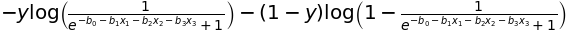

In [347]:
## Cost function
b0,b1,b2,b3,x1,x2,x3 ,y_sym = sp.symbols('b0 b1 b2 b3 x1 x2 x3 y')
z_sym = b0 + b1*x1 + b2*x2 + b3*x3
s_sym = 1/(1+sp.exp(-z_sym))
c = -y_sym*sp.log(s_sym)-(1-y_sym)*sp.log(1-s_sym)
c

In [348]:
np.random.seed(123)
B = np.random.uniform(-1,1,4) # starting values
learning = 1
n_iter = 1000
stats = []
for i in range(n_iter):
    grad = calc_gradient(y,X,B)
    B = B - learning*grad
    
    # Store output values...
    stats.append(np.hstack([cost(y,X,B),B]))
    
stats = np.array(stats)

# Let's print out the resulting coefficients ("weights")
print(B)

[1.25056959 0.49982328 0.6355503  0.50799138]


In [349]:
## We use the coefficients generated from our new train model to predict the voting likelihood of people in the test dataset
X_t = np.column_stack([np.ones(test.shape[0]),test.age, test.educate, test.income])
prob = s(X_t.dot(B))
prediction = prob >= .5
prediction = prediction.astype("int")
sum(prediction == y_test)/len(y_test)

In [350]:
import statsmodels.discrete.discrete_model as sm
sm.Logit(y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.508787
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1596
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:                  0.1091
Time:                        11:01:41   Log-Likelihood:                -814.06
converged:                       True   LL-Null:                       -913.74
Covariance Type:            nonrobust   LLR p-value:                 5.803e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2506      0.067     18.579      0.000       1.119       1.382
x1             0.4998      0.067      7.501      0.000       0.369       0.630
x2             0.6356      0.076      8.334      0.000       0.486       0.785
x3             0.5080      0.085      5.979      0.000       0.341       0.675
==============================================================================
"""

Interestingly, we hardly did better!